# installs

In [ ]:
# necessary for brainbox
! pip install ONE-api ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.3/993.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.1/397.1 kB 23.6 MB/s et

In [ ]:
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00


In [ ]:
import logging
import os

logger = logging.getLogger('ibllib')
logger.setLevel(logging.CRITICAL)

os.environ["TQDM_DISABLE"] = "1"

# imports

In [ ]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

In [ ]:
# one imports
from one.api import ONE
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from brainbox.singlecell import bin_spikes
from brainbox.singlecell import bin_spikes2D
from iblatlas.atlas import AllenAtlas
ba = AllenAtlas()

Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|██████████| 31.470260620117188/31.470260620117188 [00:00<00:00, 44.70it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|██████████| 3.848422050476074/3.848422050476074 [00:00<00:00, 38.97it/s]


## one setup

In [ ]:
#try without
#ONE.setup()

In [ ]:
one = ONE(base_url='https://openalyx.internationalbrainlab.org', \
          password='international', \
          silent=True)

## SCdg

*example* of how to query

In [ ]:
insertions = one.search_insertions(atlas_acronym='SCdg', query_type='remote')
pid = insertions[32] # example insertion
[eid, pname] = one.pid2eid(pid)

ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406

In [ ]:
def print_probe_regions(pid, eid):
    ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
    spikes, clusters, channels = ssl.load_spike_sorting()
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    unique_regions = np.unique(clusters['acronym'])
    print("Regions found in clusters:", unique_regions)

In [ ]:
print(pid)

3675290c-8134-4598-b924-83edb7940269


In [ ]:
print_probe_regions(pid,eid)

/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406

Regions found in clusters: ['MB' 'MRN' 'PRNr' 'SCdg' 'SCdw' 'SCig' 'SCiw' 'SCop' 'SCsg']


In [ ]:
import pandas as pd

In [ ]:
clusters_df = pd.DataFrame(clusters)
clusters_df[['label','acronym','cluster_id','firing_rate']]

,label,acronym,cluster_id,firing_rate
0,0.333333,PRNr,0,4.051705
1,0.000000,PRNr,1,0.315600
2,0.333333,PRNr,2,0.106423
3,0.333333,PRNr,3,0.018067
4,0.000000,PRNr,4,0.060128
...,...,...,...,...
538,0.333333,SCdw,538,0.052506
539,0.666667,SCdg,539,1.256754
540,0.666667,SCdg,540,0.491749
541,0.666667,SCdg,541,0.095132


In [ ]:
SCdg_df = clusters_df[clusters_df['acronym'] == 'SCdg']
SCdg_df = SCdg_df[SCdg_df['label']>=0.5]
SCiw_df = clusters_df[clusters_df['acronym'] == 'SCiw']
SCiw_df = SCiw_df[SCiw_df['label']>=0.5]

In [ ]:
SCdg_clusters = SCdg_df['cluster_id'].to_numpy()
SCiw_clusters = SCiw_df['cluster_id'].to_numpy()

In [ ]:
len(SCdg_clusters)

34

In [ ]:
len(SCiw_clusters)

34

In [ ]:
eid, _ = one.pid2eid(pid)
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
sl.trials['stimOn_times']

/usr/local/lib/python3.11/dist-packages/one/util.py:428: ALFWarning: Multiple revisions: "", "2024-07-15"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


,stimOn_times
0,11.531900
1,17.184194
2,22.498323
3,26.666168
4,29.964068
...,...
821,3504.438602
822,3508.405567
823,3511.953608
824,3515.770255


In [ ]:
def find_sensitive_clusters(
    pid,               # Probe insertion ID
    event_times,       # 1D array of event times (e.g. stimOn_times)
    sl,                # Your SessionLoader or object with sl.trials
    pre_time=0.5,      # Time (sec) before each event
    post_time=0.5,     # Time (sec) after each event
    bin_size=0.01,     # Bin size (sec)
    alpha=0.005,       # Significance level
    n_shuffles=500
):
    """
    1) Loads spikes/clusters for the given PID.
    2) Uses 'bin_spikes2D' to create an (nTrials x nClusters x nBins) array.
    3) Splits trials into left vs. right (based on sl.trials).
    4) Performs a permutation test for each cluster, comparing right minus left.
    5) Returns a list of "good" cluster IDs with significant modulation.
    """

    one = ONE()
    ba = AllenAtlas()

    # ---------------- Load the spike data ----------------
    ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
    spikes, clusters, channels = ssl.load_spike_sorting()
    clusters = ssl.merge_clusters(spikes, clusters, channels)

    # ---------------- Restrict to "good" clusters ----------------
    # IBL convention: label=1 => "good"
    if 'label' not in clusters:
        raise ValueError("Missing 'label' field in clusters. Cannot filter 'good' clusters.")

    good_cluster_idx = (clusters['label'] >= 0.5)  # Keeping clusters that are "good"
    good_cluster_IDs = clusters['cluster_id'][good_cluster_idx]

    # Debugging: Check how many "good" clusters exist
    print(f"Total clusters found: {len(clusters['cluster_id'])}")
    print(f"Total 'good' clusters found: {len(good_cluster_IDs)}")

    if len(good_cluster_IDs) == 0:
        raise ValueError("No good clusters found in this dataset. Check cluster labels!")

    # ---------------- Filter spikes to only "good" clusters ----------------
    good_spk_indx = np.where(np.isin(spikes['clusters'], good_cluster_IDs))[0]
    spikes_g = {key: val[good_spk_indx] for key, val in spikes.items()}

    # Ensure only good cluster IDs are used
    cluster_ids = np.array([cid for cid in np.unique(spikes_g['clusters']) if cid in good_cluster_IDs])

    print(f"Total unique 'good' clusters in spikes_g: {len(cluster_ids)}")

    # ---------------- Bin with bin_spikes2D ----------------
    event_times = np.asarray(event_times)

    # shape(raster) => (nEvents, nClusters, nBins)
    raster_3D, times = bin_spikes2D(
        spikes_g['times'],    # All spike times
        spikes_g['clusters'], # Cluster IDs for each spike
        cluster_ids,          # Which clusters to include
        event_times,          # The event times to align to
        pre_time=pre_time,
        post_time=post_time,
        bin_size=bin_size
    )

    # Convert spike counts to firing rates (spikes/sec)
    raster_3D = raster_3D / bin_size  # (nTrials, nClusters, nBins)

    # ---------------- Identify left vs right trials ----------------
    left_idx = ~np.isnan(sl.trials['contrastLeft'])
    right_idx = ~np.isnan(sl.trials['contrastRight'])

    # Convert to array of trial indices (if they are Pandas Series)
    left_idx = np.asarray(left_idx)
    right_idx = np.asarray(right_idx)

    # ---------------- Permutation test for each cluster ----------------
    sig_clusters = []
    n_clusters = len(cluster_ids)
    n_bins = raster_3D.shape[2]

    for i, cid in enumerate(cluster_ids):
        # Extract this cluster's data => shape: (nTrials, nBins)
        cluster_raster = raster_3D[:, i, :]  # slice out cluster 'i'

        # Observed difference in firing rate (Right - Left) for each bin
        obs_diff = (
            np.nanmean(cluster_raster[right_idx, :], axis=0) -
            np.nanmean(cluster_raster[left_idx, :], axis=0)
        )

        # Build the null distribution via shuffling
        shuffled_diff = np.zeros((n_shuffles, n_bins))
        for s in range(n_shuffles):
            perm_left = np.random.permutation(left_idx)
            perm_right = np.random.permutation(right_idx)
            shuffled_diff[s, :] = (
                np.nanmean(cluster_raster[perm_right, :], axis=0) -
                np.nanmean(cluster_raster[perm_left, :], axis=0)
            )

        # Compute p-values
        p_vals = np.mean(np.abs(shuffled_diff) >= np.abs(obs_diff), axis=0)

        # Bonferroni correction
        bonf_threshold = alpha / n_bins
        bonf_reject = (p_vals < bonf_threshold)

        # FDR correction
        remaining = p_vals[bonf_reject]
        if len(remaining) > 0:
            _, p_fdr_corrected, _, _ = multipletests(remaining, alpha=alpha, method='fdr_bh')
            final_reject = np.copy(bonf_reject)
            final_reject[bonf_reject] = (p_fdr_corrected < alpha)
        else:
            final_reject = np.zeros_like(p_vals, dtype=bool)

        # If more than 5 bins are significant, we call it “sensitive”
        if np.count_nonzero(final_reject) > 5:
            sig_clusters.append(cid)

        # Stop after collecting 30 clusters
        if len(sig_clusters) >= 30:
            print("Reached max of 30 sensitive clusters, stopping early.")
            return sig_clusters, times

    return sig_clusters, times

In [ ]:
def find_sensitive_clusters_dict(atlas_acronym):
    insertions = one.search_insertions(atlas_acronym=atlas_acronym, query_type='remote')
    print(f"Found {len(insertions)} insertions in {atlas_acronym}.")
    sig_clusters_dict = {}

    if len(insertions) > 0:
        pid = insertions[0]
        print("Using PID:", pid)
        eid, pname = one.pid2eid(pid)

        sl = SessionLoader(eid=eid, one=one)
        sl.load_trials()
        trials = sl.trials

        # 1) Stim
        sig_stim_clusters, stim_times = find_sensitive_clusters(
            pid,
            event_times=trials['stimOn_times'],
            sl=sl,
            pre_time=0.5,
            post_time=0.5,
            bin_size=0.05,
            alpha=0.005,
            n_shuffles=500
        )

        # 2) Movement
        sig_movement_clusters, move_times = find_sensitive_clusters(
            pid,
            event_times=trials['firstMovement_times'],
            sl=sl,
            pre_time=0.5,
            post_time=0.5,
            bin_size=0.05,
            alpha=0.005,
            n_shuffles=500
        )

        # 3) Reward
        sig_reward_clusters, reward_times = find_sensitive_clusters(
            pid,
            event_times=trials['feedback_times'],
            sl=sl,
            pre_time=0.5,
            post_time=0.5,
            bin_size=0.05,
            alpha=0.005,
            n_shuffles=500
        )

    sig_clusters_dict['pid'] = pid
    sig_clusters_dict['stimOn'] = sig_stim_clusters
    sig_clusters_dict['firstMovement'] = sig_movement_clusters
    sig_clusters_dict['feedback'] = sig_reward_clusters

    return sig_clusters_dict

In [ ]:
# Get sensitive clusters for 'SCdg' and 'SCiw'
sig_scdg = find_sensitive_clusters_dict(atlas_acronym='SCdg')
sig_sciw = find_sensitive_clusters_dict(atlas_acronym='SCiw')

Found 39 insertions in SCdg.
Using PID: 069c2674-80b0-44b4-a3d9-28337512967f


/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

Total clusters found: 1363
Total 'good' clusters found: 653
Total unique 'good' clusters in spikes_g: 653
Reached max of 30 sensitive clusters, stopping early.


/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

Total clusters found: 1363
Total 'good' clusters found: 653
Total unique 'good' clusters in spikes_g: 653
Reached max of 30 sensitive clusters, stopping early.


/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

Total clusters found: 1363
Total 'good' clusters found: 653
Total unique 'good' clusters in spikes_g: 653
Reached max of 30 sensitive clusters, stopping early.
Found 60 insertions in SCiw.
Using PID: 069c2674-80b0-44b4-a3d9-28337512967f


/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

Total clusters found: 1363
Total 'good' clusters found: 653
Total unique 'good' clusters in spikes_g: 653
Reached max of 30 sensitive clusters, stopping early.


/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

Total clusters found: 1363
Total 'good' clusters found: 653
Total unique 'good' clusters in spikes_g: 653
Reached max of 30 sensitive clusters, stopping early.


/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

Total clusters found: 1363
Total 'good' clusters found: 653
Total unique 'good' clusters in spikes_g: 653
Reached max of 30 sensitive clusters, stopping early.


In [ ]:
def extract_spikes_for_pcca_by_region(pid, sig_scdg, sig_sciw, event_type, one, ba):
    """
    Extracts spike data for PCCA analysis, keeping regions separate

    Args:
        pid: Probe insertion ID
        sig_scdg: Dictionary with sensitive clusters for SCdg
        sig_sciw: Dictionary with sensitive clusters for SCiw
        event_type: 'stimOn', 'firstMovement', or 'feedback'
        one, ba: Required objects for data loading

    Returns:
        Dictionary with separate spike data for each region
    """
    # Map event type to column name
    event_column = f"{event_type}_times"

    # Get the clusters for each region
    scdg_clusters = set(sig_scdg[event_type])
    sciw_clusters = set(sig_sciw[event_type])

    # We need at least one cluster from each region to load session data
    reference_cluster = next(iter(scdg_clusters)) if scdg_clusters else next(iter(sciw_clusters))

    # Load session data once for efficiency
    all_spikes, all_clusters, sl = load_cluster_data(pid, reference_cluster, one, ba)

    # Get event times
    if event_column not in sl.trials.columns:
        raise ValueError(f"{event_column} not found in trials data")

    event_times = sl.trials[event_column].to_numpy()

    # Process SCdg clusters
    scdg_data = {}
    for cluster_id in scdg_clusters:
        try:
            # Get spike times for this cluster
            cluster_spike_times = all_spikes['times'][all_spikes['clusters'] == cluster_id]

            # Bin the spikes
            binned_spikes, bin_times = bin_spikes(
                cluster_spike_times, event_times,
                pre_time=0.5, post_time=1.0, bin_size=0.05
            )

            scdg_data[cluster_id] = {
                'times': cluster_spike_times,
                'binned': binned_spikes,
                'bin_times': bin_times
            }
        except Exception as e:
            print(f"Error processing SCdg cluster {cluster_id}: {e}")

    # Process SCiw clusters
    sciw_data = {}
    for cluster_id in sciw_clusters:
        try:
            # Get spike times for this cluster
            cluster_spike_times = all_spikes['times'][all_spikes['clusters'] == cluster_id]

            # Bin the spikes
            binned_spikes, bin_times = bin_spikes(
                cluster_spike_times, event_times,
                pre_time=0.5, post_time=1.0, bin_size=0.05
            )

            sciw_data[cluster_id] = {
                'times': cluster_spike_times,
                'binned': binned_spikes,
                'bin_times': bin_times
            }
        except Exception as e:
            print(f"Error processing SCiw cluster {cluster_id}: {e}")

    return {
        'SCdg': scdg_data,
        'SCiw': sciw_data,
        'trials': sl,
        'event_times': event_times,
        'bin_times': bin_times if 'bin_times' in locals() else None
    }

In [ ]:
def sort_trials_condition(sl, condition='left-right'):
    """
    Returns (trial_idx, dividers, colors, labels) for the specified condition.
    Conditions:
      1) 'left-right': sorts by choice=-1 (left) vs choice=+1 (right)
      2) 'correct-incorrect': uses sl.trials['feedbackType'] == 1 => correct, 0 => incorrect
      3) 'all': lumps all trials together
    """

    valid_idx = np.arange(len(sl.trials))
    if 'choice' in sl.trials.columns:
        pass

    # build arrays
    choice = sl.trials['choice'].to_numpy()
    fb_type = None
    if 'feedbackType' in sl.trials.columns:
        fb_type = sl.trials['feedbackType'].to_numpy()

    if condition == 'left-right':
        left_idx = np.where(choice == -1)[0]
        right_idx = np.where(choice == 1)[0]
        trial_idx = np.concatenate([left_idx, right_idx])
        dividers = [len(left_idx)]
        colors = ['orange', 'purple']
        labels = ['Left', 'Right']

    elif condition == 'correct-incorrect':
        if fb_type is None:
            raise ValueError("feedbackType not found in sl.trials; can't do correct-incorrect sort.")
        corr_idx = np.where(fb_type > 0)[0]
        incorr_idx = np.where(fb_type < 0)[0]
        trial_idx = np.concatenate([corr_idx, incorr_idx])
        dividers = [len(corr_idx)]
        colors = ['green', 'red']
        labels = ['Correct', 'Incorrect']

    elif condition == 'all':
        # All trials in one block
        trial_idx = np.arange(len(sl.trials))
        dividers = []
        colors = ['gray']
        labels = ['All Trials']
    else:
        raise ValueError(f"Unknown condition: {condition}")

    # Filter out any out-of-range indices if needed
    trial_idx = trial_idx[trial_idx < len(sl.trials)]

    return trial_idx, dividers, colors, labels

In [ ]:
def prepare_pcca_matrices(region_data, condition='left-right'):
    """
    Prepares data matrices for PCCA between SCdg and SCiw

    Args:
        region_data: Output from extract_spikes_for_pcca_by_region
        condition: 'left-right', 'correct-incorrect', or 'all'

    Returns:
        X_scdg, X_sciw: Data matrices for each region
        trial_idx: Sorted trial indices
    """
    trials = region_data['trials']

    # Get trial indices for the condition
    trial_idx, dividers, colors, labels = sort_trials_condition(trials, condition)

    # Get binned data for both regions
    scdg_binned = []
    scdg_clusters = []
    for cluster_id, data in region_data['SCdg'].items():
        scdg_binned.append(data['binned'][trial_idx])
        scdg_clusters.append(cluster_id)

    sciw_binned = []
    sciw_clusters = []
    for cluster_id, data in region_data['SCiw'].items():
        sciw_binned.append(data['binned'][trial_idx])
        sciw_clusters.append(cluster_id)

    # Check if we have data for both regions
    if not scdg_binned or not sciw_binned:
        print("Missing data for one or both regions")
        return None, None, None, None, None

    # Get dimensions
    n_trials = scdg_binned[0].shape[0]
    n_timebins = scdg_binned[0].shape[1]
    n_scdg = len(scdg_binned)
    n_sciw = len(sciw_binned)

    # Create arrays [trials × time × neurons] for each region
    X_scdg = np.zeros((n_trials, n_timebins, n_scdg))
    for i, binned in enumerate(scdg_binned):
        X_scdg[:, :, i] = binned

    X_sciw = np.zeros((n_trials, n_timebins, n_sciw))
    for i, binned in enumerate(sciw_binned):
        X_sciw[:, :, i] = binned

    return X_scdg, X_sciw, trial_idx, scdg_clusters, sciw_clusters

In [ ]:
def load_cluster_data(pid, cluster_id, one, ba):
    """
    Loads spikes and trials for the given probe insertion ID (pid),
    filters to 'good' clusters, and returns:
      - spikes_g (dict of spike times/clusters for good clusters)
      - sl (SessionLoader with sl.trials)
      - cluster_id (the same, but we confirm it's 'good')
    Raises ValueError if cluster_id not found among good clusters.
    """

    # --- load the spike data ---
    ssl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
    spikes, clusters, channels = ssl.load_spike_sorting()
    clusters = ssl.merge_clusters(spikes, clusters, channels)

    # --- filter to good clusters ---
    good_mask = (clusters['label'] >= 0.5) #kinda good clusters
    good_cluster_ids = clusters['cluster_id'][good_mask]
    if cluster_id not in good_cluster_ids:
        raise ValueError(f"Cluster {cluster_id} is not labeled 'good' or not found in this PID.")

    # filter spikes
    good_spk_idx = np.where(np.isin(spikes['clusters'], good_cluster_ids))[0]
    spikes_g = {k: v[good_spk_idx] for k, v in spikes.items()}

    # print how many SCdg clusters we have
    scdg_mask = (clusters['acronym'][good_mask] == 'SCdg')
    scdg_ids = clusters['cluster_id'][good_mask][scdg_mask]
    print(f"SCdg clusters found: {scdg_ids}")

    # --- Load trials ---
    eid, pname = one.pid2eid(pid)
    sl = SessionLoader(eid=eid, one=one)
    sl.load_trials()

    return spikes_g, clusters, sl

In [ ]:
data = extract_spikes_for_pcca_by_region(sig_scdg['pid'], sig_scdg, sig_sciw,'stimOn', one, ba)

/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.amps.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/spikes.times.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning: No default revision for dataset alf/probe00/pykilosort/#2024-05-06#/clusters.channels.npy; using most recent
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/one/util.py:406: ALFWarning:

SCdg clusters found: [1053 1054 1055 1056 1057 1058 1061 1064 1065 1067 1068 1069 1071 1072
 1074 1075 1077 1078 1079 1081 1084 1085 1086 1089 1090 1091 1092 1093
 1094 1095 1097 1098 1099 1100 1101 1108 1109 1112 1113 1114 1323]


In [ ]:
X_scdg, X_sciw, trial_idx, scdg_clusters, sciw_clusters = prepare_pcca_matrices(data, condition='left-right')

In [ ]:
"""============================================================================
Probabilistic canonical correlation analysis. For references in comments:

    A Probabilistic Interpretation of Canonical Correlation Analysis.
    Bach, Jordan (2006).

    The EM algorithm for mixtures of factor analyzers.
    Ghahramani, Hinton (1996).
============================================================================"""

import numpy as np

inv = np.linalg.inv


# -----------------------------------------------------------------------------

class PCCA:

    def __init__(self, n_components, n_iters, regularization=1.0):
        """Initialize probabilistic CCA model.
        """
        self.k = n_components
        self.n_iters = n_iters
        self.reg = regularization

    def fit(self, X1, X2):
        """Fit model via EM.
        """
        self._init_params(X1, X2)
        #np.linalg.cholesky(self.Psi)
        print('is psd')
        for _ in range(self.n_iters):
            self._em_step()
            #np.linalg.cholesky(self.Psi)

    def transform(self, X1, X2):
        """Embed data using fitted model.
        """
        X = np.hstack([X1, X2]).T
        Psi_inv = inv(self.Psi)
        M = inv(np.eye(self.k) + self.W.T @ Psi_inv @ self.W)
        Z = M @ self.W.T @ Psi_inv @ X
        return Z.T

    def fit_transform(self, X1, X2):
        self.fit(X1, X2)
        return self.transform(X1, X2)

    def sample(self, n_samples=None):
        """Sample from the fitted model.
        """

        if n_samples is None:
          n_samples = self.n

        Psi_inv = inv(self.Psi)
        M = inv(np.eye(self.k) + self.W.T @ Psi_inv @ self.W)
        Z_post_mean = M @ self.W.T @ Psi_inv @ self.X

        X_mean = self.W @ Z_post_mean
        X_samples = np.zeros((self.n, self.p))
        for i in range(self.n):
            X_samples[i] = np.random.multivariate_normal(X_mean[:, i], self.Psi)

        # Partition the columns => (X1, X2)
        X1_samples = X_samples[:, :self.p1]  # shape => (n, p1)
        X2_samples = X_samples[:, self.p1:]  # shape => (n, p2)

        return X1_samples, X2_samples

# -----------------------------------------------------------------------------

    def _em_step(self):
        Psi_inv = inv(self.Psi)
        M = inv(np.eye(self.k) + self.W.T @ Psi_inv @ self.W)
        Z = M @ self.W.T @ Psi_inv @ self.X
        Ezz = Z @ Z.T + self.n * M

        # Update W explicitly
        W_new = (self.X @ Z.T) @ inv(Ezz)

        # Compute residuals explicitly
        X_recon = W_new @ Z
        residual = self.X - X_recon

        # Clearly separate Psi1 and Psi2
        residual1 = residual[:self.p1, :]
        residual2 = residual[self.p1:, :]

        Psi1_new = (residual1 @ residual1.T) / self.n + self.reg * np.eye(self.p1)
        Psi2_new = (residual2 @ residual2.T) / self.n + self.reg * np.eye(self.p2)

        # Combine Psi clearly
        self.Psi = np.block([
            [Psi1_new, np.zeros((self.p1, self.p2))],
            [np.zeros((self.p2, self.p1)), Psi2_new]
        ])

        # Update W
        self.W = (self.X @ Z.T) @ inv(Ezz)



    def _init_params(self, X1, X2):
        """Initialize parameters.
        """
        self.X1, self.X2 = X1, X2
        self.n, self.p1 = self.X1.shape
        _, self.p2 = self.X2.shape
        self.p = self.p1 + self.p2

        # Initialize sample covariances matrices.
        self.X = np.hstack([X1, X2]).T
        assert(self.X.shape == (self.p, self.n))
        self.Sigma1 = np.cov(self.X1.T)
        assert(self.Sigma1.shape == (self.p1, self.p1))
        self.Sigma2 = np.cov(self.X2.T)
        assert(self.Sigma2.shape == (self.p2, self.p2))

        # Initialize W.
        W1 = np.random.random((self.p1, self.k))
        W2 = np.random.random((self.p2, self.k))
        self.W = np.vstack([W1, W2])
        assert(self.W.shape == (self.p, self.k))

        # Initialize Psi.
        prior_var1 = 1
        prior_var2 = 1
        Psi1 = prior_var1 * np.eye(self.p1)
        Psi2 = prior_var2 * np.eye(self.p2)
        Psi = np.block([[Psi1, np.zeros((self.p1, self.p2))],
                        [np.zeros((self.p2, self.p1)), Psi2]])
        self.Psi = Psi

In [ ]:
from sklearn.decomposition import PCA

# Original 3D shapes
print(X_scdg.shape)  # (n_trials, n_clusters, n_time_bins)
print(X_sciw.shape)

# Reshape into 2D (flatten cluster and time dimensions)
X_scdg_flat = X_scdg.reshape(X_scdg.shape[0], -1)
X_sciw_flat = X_sciw.reshape(X_sciw.shape[0], -1)

print(X_scdg_flat.shape)  # (n_trials, n_clusters * n_time_bins)
print(X_sciw_flat.shape)

# Apply PCA to reduce dimensionality
pca_components = 200  # You can adjust this based on variance explained
pca1 = PCA(n_components=pca_components)
pca2 = PCA(n_components=pca_components)

X1_pcca = pca1.fit_transform(X_scdg_flat)
X2_pcca = pca2.fit_transform(X_sciw_flat)

print(X1_pcca.shape)  # Now (n_trials, pca_components)
print(X2_pcca.shape)

(762, 30, 30)
(762, 30, 30)
(762, 900)
(762, 900)
(762, 200)
(762, 200)


takes about 2.5 mins per latent dim

is psd
latent_dims 1 done
is psd
latent_dims 2 done
is psd
latent_dims 3 done
is psd
latent_dims 4 done
is psd
latent_dims 5 done
is psd
latent_dims 6 done
is psd
latent_dims 7 done
is psd
latent_dims 8 done
is psd
latent_dims 9 done
is psd
latent_dims 10 done
is psd
latent_dims 11 done
is psd
latent_dims 12 done
is psd
latent_dims 13 done
is psd
latent_dims 14 done


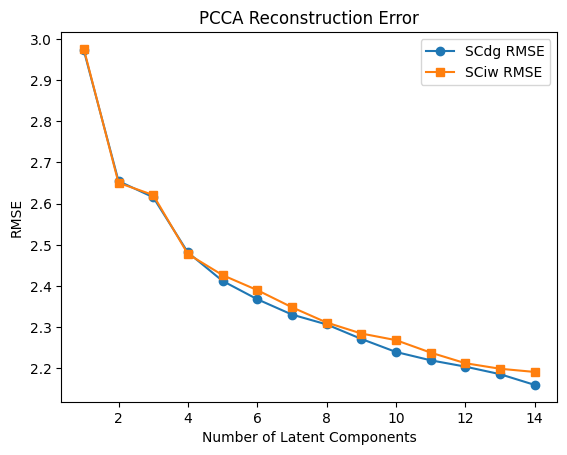

In [ ]:
def pcca_rmse(X1, X2, components=2):
    # 1) Fit
    pcca = PCCA(components, 100)
    pcca.fit(X1_pcca, X2_pcca)

    # 2) Generate same # of samples as original
    n_samples = X1.shape[0]
    X1_gen, X2_gen = pcca.sample()

    # 3) RMSE
    num_samples = min(X1.shape[0], X2.shape[0])

    if X1.shape[0] != X2.shape[0]:
        X1, X2 = X1[:num_samples], X2[:num_samples]

    rmse1 = np.sqrt(np.mean((X1_gen - X1_pcca)**2))
    rmse2 = np.sqrt(np.mean((X2_gen - X2_pcca)**2))
    return rmse1, rmse2

# Suppose X1, X2 are (nSamples, nFeaturesA/B)
latent_dims = range(1,15)
rmseA, rmseB = [], []

for d in latent_dims:
    rA, rB = pcca_rmse(X1_pcca, X2_pcca, d)
    rmseA.append(rA)
    rmseB.append(rB)
    print(f"latent_dims {d} done")

plt.plot(latent_dims, rmseA, marker='o', label='SCdg RMSE')
plt.plot(latent_dims, rmseB, marker='s', label='SCiw RMSE')
plt.xlabel("Number of Latent Components")
plt.ylabel("RMSE")
plt.title("PCCA Reconstruction Error")
plt.legend()
plt.show()

In [ ]:
print("Mean of original data:", X_scdg_flat.mean(), X_sciw_flat.mean())
print("Std deviation of original data:", X_scdg_flat.std(), X_sciw_flat.std())

Mean of original data: 0.5955030621172354 0.608257509477982
Std deviation of original data: 1.1702326027242673 1.1787108820356744


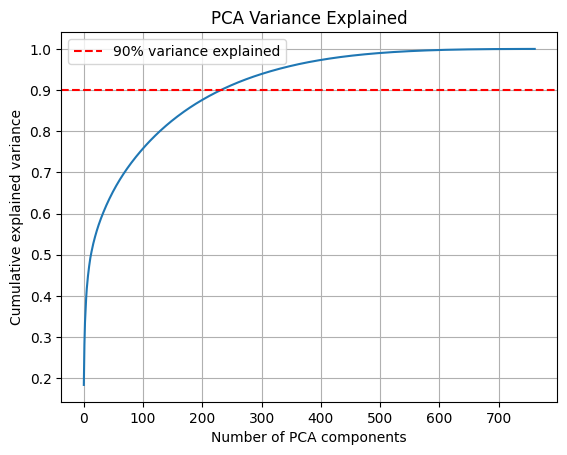

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X_scdg_flat)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance explained')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Variance Explained')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=50)
X_scdg_pca = pca.fit_transform(X_scdg_flat)
X_scdg_reconstructed = pca.inverse_transform(X_scdg_pca)

pca_rmse = np.sqrt(mean_squared_error(X_scdg_flat, X_scdg_reconstructed))
print("PCA-only RMSE:", pca_rmse)


PCA-only RMSE: 0.6243171512617182


In [ ]:
from sklearn.cross_decomposition import CCA
from sklearn.metrics import mean_squared_error

cca = CCA(n_components=9)  # match your latent dimensions
X1_c, X2_c = cca.fit_transform(X1_pcca, X2_pcca)

# Reconstruct data
X1_rec = cca.inverse_transform(X1_c)
X2_rec = cca.inverse_transform(X2_c)

rmse1 = np.sqrt(mean_squared_error(X1_pcca, X1_rec))
rmse2 = np.sqrt(mean_squared_error(X2_pcca, X2_rec))

print("CCA RMSE (X1):", rmse1)
print("CCA RMSE (X2):", rmse2)


/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


CCA RMSE (X1): 1.8027479430698465
CCA RMSE (X2): 1.8810855585125341


In [ ]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=5)
X1_c, X2_c = cca.fit_transform(X1_pcca, X2_pcca)

# Evaluate canonical correlations
canonical_corrs = [np.corrcoef(X1_c[:, i], X2_c[:, i])[0, 1] for i in range(X1_c.shape[1])]
print("Canonical correlations:", canonical_corrs)


/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Canonical correlations: [0.9999903384602858, 0.9992698366656785, 0.9991730141739421, 0.9987479035356808, 0.9990026187097474]


/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Canonical correlations: [0.996 0.994 0.999 0.998 0.995 0.986 0.986 0.99  0.979 0.929]


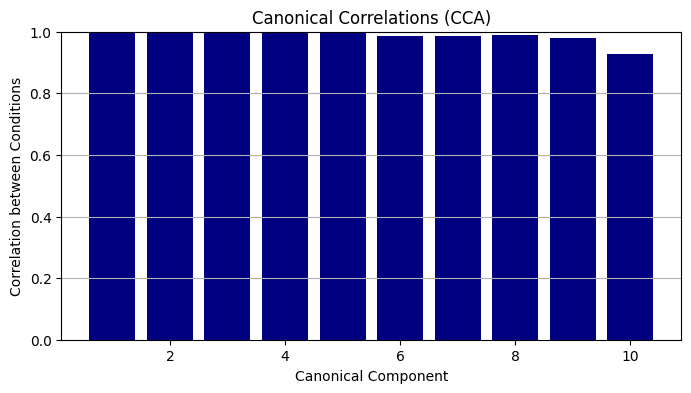

In [ ]:
from sklearn.cross_decomposition import CCA
import numpy as np
import matplotlib.pyplot as plt

# Fit CCA clearly
n_components = 10  # adjust as needed
cca = CCA(n_components=n_components)
cca.fit(X1_pcca, X2_pcca)

# Transform datasets
X1_c, X2_c = cca.transform(X1_pcca, X2_pcca)

# Compute correlations
corrs = [np.corrcoef(X1_pcca[:, i], X2_pcca[:, i])[0, 1] for i in range(n_components)]
print("Canonical correlations:", np.round(corrs, 3))

# Plot canonical correlations clearly
plt.figure(figsize=(8, 4))
plt.bar(range(1, n_components + 1), corrs, color='navy')
plt.xlabel('Canonical Component')
plt.ylabel('Correlation between Conditions')
plt.title('Canonical Correlations (CCA)')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cross_decomposition/_pls.py:113: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Canonical correlations: [1.    0.999 0.999 0.999 0.999]


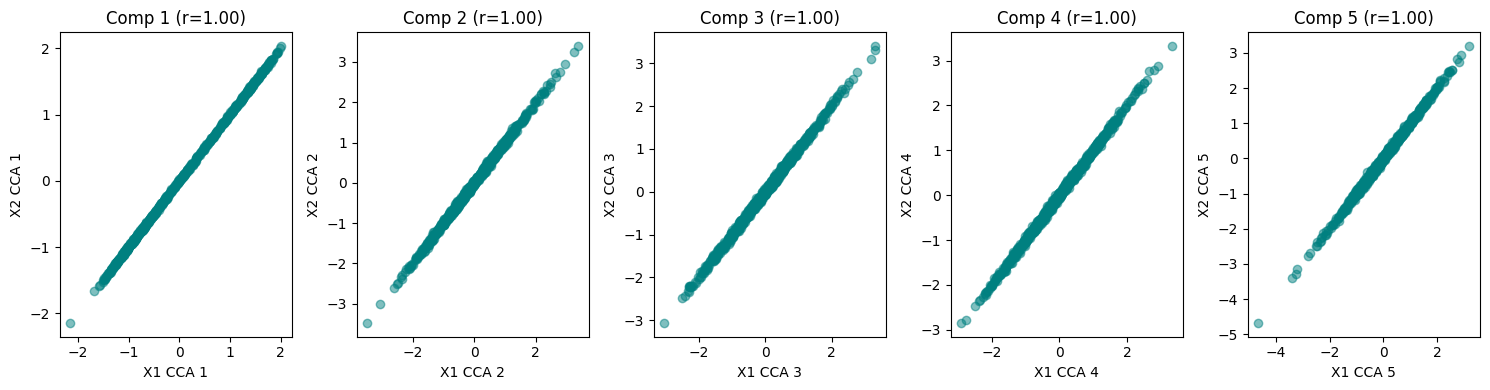

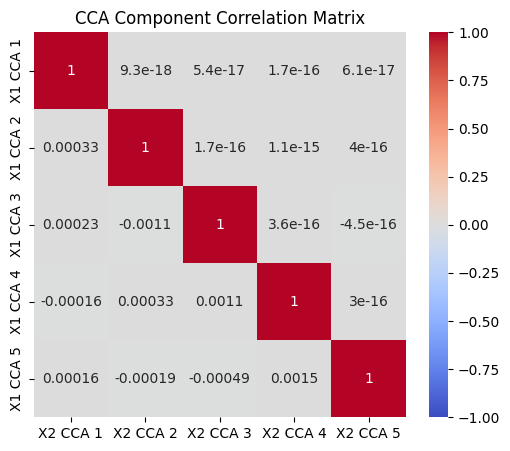

In [ ]:
from sklearn.cross_decomposition import CCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fit CCA
n_components = 5  # Adjust as needed
cca = CCA(n_components=n_components)
X1_c, X2_c = cca.fit_transform(X1_pcca, X2_pcca)

# Compute correlations
corrs = [np.corrcoef(X1_c[:, i], X2_c[:, i])[0, 1] for i in range(n_components)]
print("Canonical correlations:", np.round(corrs, 3))

# --- Scatter plot of CCA components ---
fig, axes = plt.subplots(1, n_components, figsize=(15, 4))
for i in range(n_components):
    axes[i].scatter(X1_c[:, i], X2_c[:, i], alpha=0.5, color='teal')
    axes[i].set_xlabel(f'X1 CCA {i+1}')
    axes[i].set_ylabel(f'X2 CCA {i+1}')
    axes[i].set_title(f'Comp {i+1} (r={corrs[i]:.2f})')

plt.tight_layout()
plt.show()

# --- Correlation matrix heatmap ---
corr_matrix = np.corrcoef(X1_c.T, X2_c.T)[:n_components, n_components:]
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=[f'X2 CCA {i+1}' for i in range(n_components)], yticklabels=[f'X1 CCA {i+1}' for i in range(n_components)])
plt.title("CCA Component Correlation Matrix")
plt.show()
